No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Specified point: (5, 6) -> Predicted: Apple


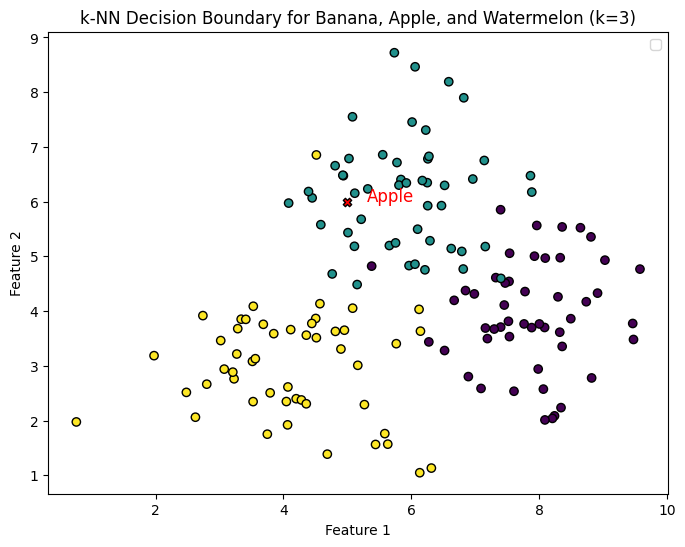

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
np.random.seed(42)

# Create three classes of points
banana = np.random.randn(50, 2) + [8, 4]
apple = np.random.randn(50, 2) + [6, 6]
watermelon = np.random.randn(50, 2) + [4, 3]

# Combine the data
data = np.vstack((banana, apple, watermelon))
labels = np.hstack((np.zeros(50), np.ones(50), np.full(50, 2)))

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df['Label'] = labels

# Step 2: Implement k-NN Algorithm
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(df, new_point, k=3):
    distances = []
    
    # Calculate distance from new_point to all other points
    for index, row in df.iterrows():
        dist = euclidean_distance(np.array([row['Feature1'], row['Feature2']]), new_point)
        distances.append((dist, row['Label']))
    
    # Sort distances and select the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    
    # Determine the majority label
    labels = [label for _, label in k_nearest]
    prediction = max(set(labels), key=labels.count)
    
    return prediction


specified_point = np.array([5, 6])
prediction = knn_predict(df, specified_point, k=3)
label_name = ['Banana', 'Apple', 'Watermelon'][int(prediction)]
print(f"Specified point: ({specified_point[0]}, {specified_point[1]}) -> Predicted: {label_name}")

plt.figure(figsize=(8, 6))
plt.scatter(df['length'], df['width'], c=df['Label'], cmap='viridis', edgecolor='k')
plt.scatter(specified_point[0], specified_point[1], c='red', edgecolor='k', marker='X')
plt.text(specified_point[0] + 0.3, specified_point[1], label_name, color='red', fontsize=12)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN Decision Boundary for Banana, Apple, and Watermelon (k=3)')
plt.legend()
plt.show()